# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [133]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap

Load feature names.

In [36]:
feature_names = []
with open('../Data/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print 'Loaded feature names:', len(feature_names)

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [37]:
X, Y = [], []

with open('../Data/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print train_data.shape, test_data.shape

(7000, 126) (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

In [52]:
def P1():
### STUDENT START ###
    pca = PCA()
    pca.fit(train_data)
    for k in range (1,51):
        print "Explained variance ratio for the first ", k, "components is: ", sum(pca.explained_variance_ratio_[0:k])
### STUDENT END ###

P1()

Explained variance ratio for the first  1 components is:  0.164043312793
Explained variance ratio for the first  2 components is:  0.297278101488
Explained variance ratio for the first  3 components is:  0.399012666709
Explained variance ratio for the first  4 components is:  0.469646231059
Explained variance ratio for the first  5 components is:  0.508312694566
Explained variance ratio for the first  6 components is:  0.545120737641
Explained variance ratio for the first  7 components is:  0.576403128668
Explained variance ratio for the first  8 components is:  0.603740502195
Explained variance ratio for the first  9 components is:  0.629905406884
Explained variance ratio for the first  10 components is:  0.652214832563
Explained variance ratio for the first  11 components is:  0.672696562099
Explained variance ratio for the first  12 components is:  0.69137986869
Explained variance ratio for the first  13 components is:  0.70872408902
Explained variance ratio for the first  14 compon

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

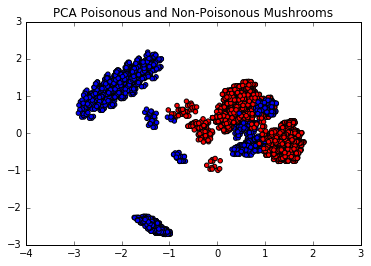

In [53]:
def P2():
### STUDENT START ###
    num_components = 2
    # Projecting the training data down to 2 dimensions
    pca_2 = PCA(n_components=num_components)
    # Fitting the model on the training data
    train_2 = pca_2.fit_transform(train_data)
    
    # plotting the data
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    p = plt.subplot(1, 1, 1)
    p.scatter(train_2[:, 0], train_2[:, 1], 
          c=train_labels, cmap=cm_bright)
    plt.title("PCA Poisonous and Non-Poisonous Mushrooms")
### STUDENT END ###

P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

2.98858814531


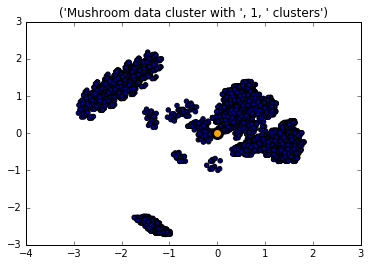

3.90073255906


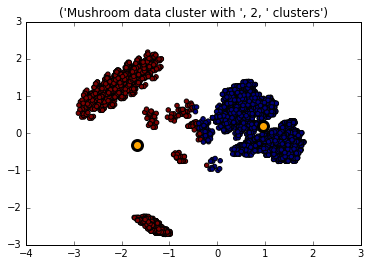

4.64543955176


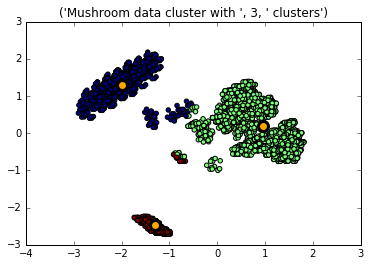

4.67064147751


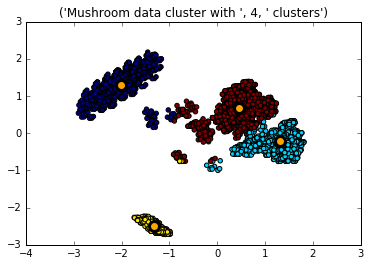

4.67874421079


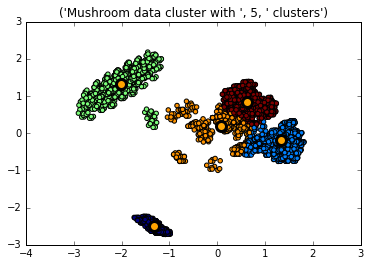

4.67874421079


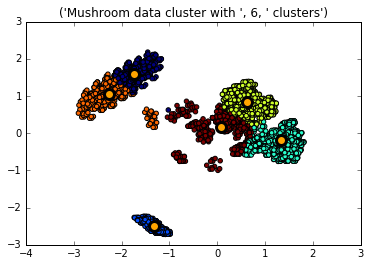

4.67874421079


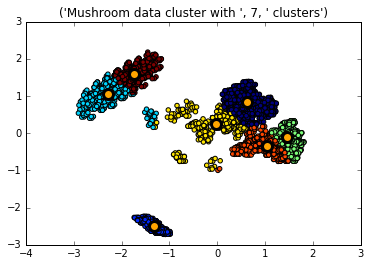

4.67874421079


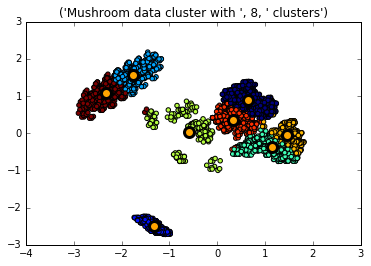

4.67874421079


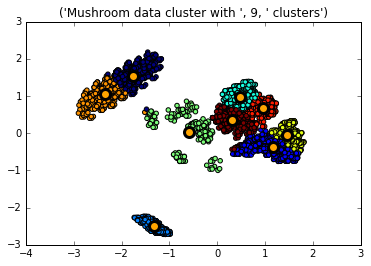

4.67874421079


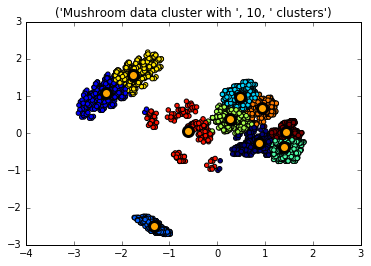

4.67874421079


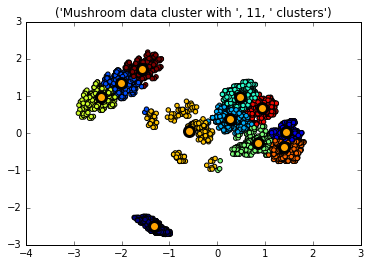

4.67874421079


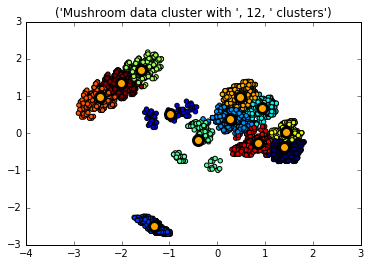

4.67874421079


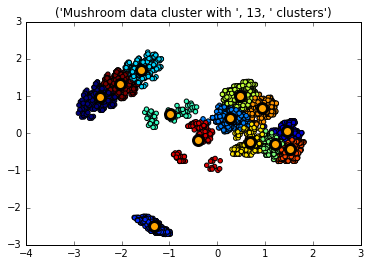

4.79743412819


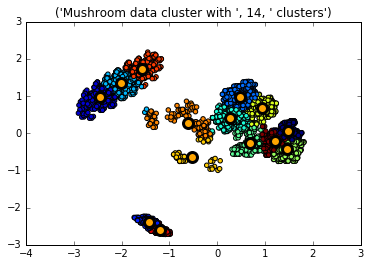

4.79743412819


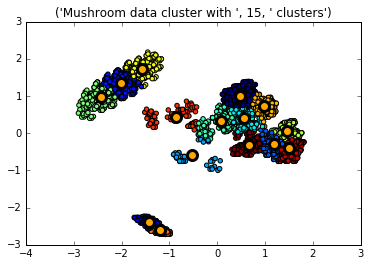

4.79743412819


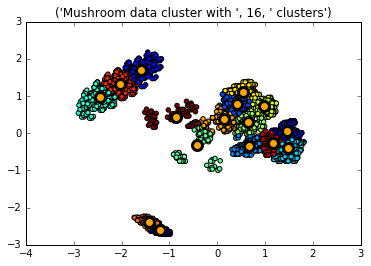

In [144]:
def P3():
### STUDENT START ###
    num_components = 2
    # Projecting the training data down to 2 dimensions
    pca_2 = PCA(n_components=num_components)
    # Fitting the model on the training data
    train_2 = pca_2.fit_transform(train_data)
    for cluster_cnt in range(1,17):
        # Creating KMeans model
        kmeans = KMeans(n_clusters=cluster_cnt)
        # Fitting the model to the two dimensional data
        trained_cluster = kmeans.fit_predict(train_2)
        
        #Plotting the data
        plt.subplot(1,1,1)
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        plt.scatter(train_2[:,0],train_2[:,1],c=trained_cluster)
        title = "Mushroom data cluster with ", cluster_cnt, " clusters"
        plt.title(title)
        
        # Plotting the centroid 
        plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 100, c='orange', linewidths=3)
        
        
        X = kmeans.transform(train_2)
        
        radius =  X.max()
        circle=plt.Circle((kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1]),radius,color='yellow',fill=False)
        
        
        ##Plot the furthest point
        #loop through all points, create an array to hold maxes.
        #come back and plot the max circles
        
        
        
        plt.show()
        
        
### STUDENT END ###

P3()

# # (4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

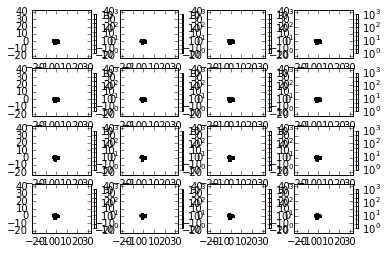

In [132]:
def P4():
### STUDENT START ###
    num_components = 2
    # Projecting the training data down to 2 dimensions
    pca_2 = PCA(n_components=num_components)
    # Fitting the model on the training data
    train_2 = pca_2.fit_transform(train_data)
    train_2_positive = train_2[train_labels==1]
    
    covariance_arr = ['spherical','diag','tied','full']
    mix_components = range(1,5)
    i = 0
    for mix_component in mix_components:
        for covariance in covariance_arr:
            i += 1
            p = plt.subplot(len(covariance_arr), len(mix_components),  i)
            gmm = GMM(n_components=mix_component,covariance_type=covariance)
            gmm.fit(train_2_positive)
            x = np.linspace(-20.0, 30.0)
            y = np.linspace(-20.0, 40.0)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = gmm.score_samples(XX)[0]
            Z = Z.reshape(X.shape)

            CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=100.0),
                 levels=np.logspace(0, 3, 10))
            CB = plt.colorbar(CS, shrink=0.8, extend='both')
            plt.scatter(train_2[:, 0], train_2[:, 1], 0.8)
            

    #plt.title('Negative log-likelihood predicted by a GMM')
    #plt.axis('tight')
    plt.show()
    plt.savefig('test.png',dpi=3000)
            
### STUDENT END ###

P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [93]:
def P5():
### STUDENT START ###
    num_components = 2
    # Projecting the training data down to 2 dimensions
    pca = PCA(n_components=num_components)
    # Fitting the model on the training data
    train_2d = pca.fit_transform(train_data)
    test_2d = pca.fit_transform(test_data)
    
    train_2d_positive = train_2d[train_labels==1]
    train_2d_negative = train_2d[train_labels==0]
    
    #test_2d_positive = test_2d[test_labels==1]
    #test_2d_negative = test_2d[test_labels==0]
    
    covariance = 'full'
    mix_component = 4
    
    #Declaring positive and negative gmm models
    gmm_positive = GMM(n_components=mix_component,covariance_type=covariance)
    gmm_negative = GMM(n_components=mix_component,covariance_type=covariance)
    
    # Fitting both the models with corresponding positive and negative data
    gmm_positive.fit(train_2d_positive)
    gmm_negative.fit(train_2d_negative)
    
    
    predict_positive = gmm_positive.predict(test_2d)
    # Getting Log Probability scores of test data
    postive_scores = gmm_positive.score(test_2d)
    print 'Max score for model fitted with positive data ', postive_scores.max()
    positive_accuracy = metrics.accuracy_score(predict_positive,test_labels)
    print 'Accuracy for model with positive data: ', positive_accuracy
    
    predict_negative = gmm_negative.predict(test_2d)
    # Getting Log Probability scores of test data
    negative_scores = gmm_negative.score(test_2d)
    print 'Max score for model fitted with nagative data ', negative_scores.max()
    negative_accuracy = metrics.accuracy_score(predict_negative,test_labels)
    print 'Accuracy for model with negative data: ',negative_accuracy
    
    
### STUDENT END ###

P5()

Max score for model fitted with positive data  -1.31390052254
Accuracy for model with positive data:  0.247330960854
Max score for model fitted with nagative data  0.0598914892516
Accuracy for model with negative data:  0.0311387900356


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [113]:
def P6():
### STUDENT START ###
    
    # Assumption: We are disregarding the 1 dimensional vector space here.
    num_pca_components = [2,3]
    num_gmm_components = [2,3]
    # Valid pairs (2,2),(2,3),(3,2)
    #total_params = 2*num_pca_components*num_gmm_components*num_gmm_components
    #if total_params > 50:
    #    print 'Total number of parameters is ', total_params, 'and it exceeds the limit of 50, program aborting..'
    
    pca_2d = PCA(n_components=num_pca_components[0])
    train_2d = pca_2d.fit_transform(train_data) 
    test_2d = pca_2d.fit_transform(test_data)
    
    pca_3d = PCA(n_components=num_pca_components[1])
    train_3d = pca_3d.fit_transform(train_data) 
    test_3d = pca_3d.fit_transform(test_data)
    
    covariances = ['spherical','diag','tied','full']
    for covariance in covariances:
        #GMM with 2 components, will be used for PCA with 2d
        gmm_2_2d = GMM(n_components=num_gmm_components[0],covariance_type=covariance)
        #GMM with 2 components, will be used for PCA with 3d
        gmm_2_3d = GMM(n_components=num_gmm_components[0],covariance_type=covariance)
        #GMM with 3 components, will be used for PCA with 2d
        gmm_3_2d = GMM(n_components=num_gmm_components[1],covariance_type=covariance)
        
        # Fit GMM 2 componets with 2d
        gmm_2_2d.fit(train_2d)
        # Fit GMM 3 componets with 2d
        gmm_3_2d.fit(train_2d)
        # Fit GMM 2 componets with 3d
        gmm_2_3d.fit(train_3d)
        
        # Predict GMM 2 componets with 2d
        predict_ggm2_2d = gmm_2_2d.predict(test_2d)
        accuracy_gmm2_2d = metrics.accuracy_score(predict_ggm2_2d,test_labels)
        print 'For PCA with 2 dims and GMM with 2 componets and covariance of ',covariance,'accuracy is ',accuracy_gmm2_2d
        
        # Predict GMM 2 componets with 3d
        predict_ggm2_3d = gmm_2_3d.predict(test_3d)
        accuracy_gmm2_3d = metrics.accuracy_score(predict_ggm2_3d,test_labels)
        print 'For PCA with 2 compoents and GMM with 2 componets and covariance of ',covariance,'accuracy is ',accuracy_gmm2_3d
        
        # Predict GMM 3 componets with 2d
        predict_ggm3_2d = gmm_3_2d.predict(test_2d)
        accuracy_gmm3_2d = metrics.accuracy_score(predict_ggm3_2d,test_labels)
        print 'For PCA with 2 compoents and GMM with 3 componets and covariance of ',covariance,'accuracy is ',accuracy_gmm3_2d

### STUDENT END ###

P6()

For PCA with 2 dims and GMM with 2 componets and covariance of  spherical accuracy is  0.19128113879
For PCA with 2 compoents and GMM with 2 componets and covariance of  spherical accuracy is  0.55871886121
For PCA with 2 compoents and GMM with 3 componets and covariance of  spherical accuracy is  0.346085409253
For PCA with 2 dims and GMM with 2 componets and covariance of  diag accuracy is  0.321174377224
For PCA with 2 compoents and GMM with 2 componets and covariance of  diag accuracy is  0.679715302491
For PCA with 2 compoents and GMM with 3 componets and covariance of  diag accuracy is  0.360320284698
For PCA with 2 dims and GMM with 2 componets and covariance of  tied accuracy is  0.321174377224
For PCA with 2 compoents and GMM with 2 componets and covariance of  tied accuracy is  0.672597864769
For PCA with 2 compoents and GMM with 3 componets and covariance of  tied accuracy is  0.433274021352
For PCA with 2 dims and GMM with 2 componets and covariance of  full accuracy is  0.